## Dataset used: Online Shoppers Intension
https://www.kaggle.com/code/officialsubhash/online-shoppers-intention-eda-complete


 Conmma is used for the separator in this csv file, so we do not need to set particular argument for the separator when using csv().
 csv() read default separator, which is comma when we don't set argument for the separator.

In [ ]:
ol_shoppers_int = read.csv("online_shoppers_intention.csv") # read the csv file into the dataframe
head(ol_shoppers_int, n = 6) # specify the number of rows I want for output and display the dataframe

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
summary(ol_shoppers_int) # get summery statics for each of all columns(entire dataset)

 Administrative   Administrative_Duration Informational    
 Min.   : 0.000   Min.   :   0.00         Min.   : 0.0000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.000   Median :   7.50         Median : 0.0000  
 Mean   : 2.315   Mean   :  80.82         Mean   : 0.5036  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.0000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.0000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :   0.00        Min.   :  0.00   Min.   :    0.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  184.1        
 Median :   0.00        Median : 18.00   Median :  598.9        
 Mean   :  34.47        Mean   : 31.73   Mean   : 1194.8        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates         ExitRates         PageValues        SpecialDay     
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.0

In [ ]:
str(ol_shoppers_int) # get data types of each of all columns

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning_Visito

In [ ]:
install.packages("ggplot2")
library(ggplot2)
# install and load the ggplot2 package for future plot of the graphs.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



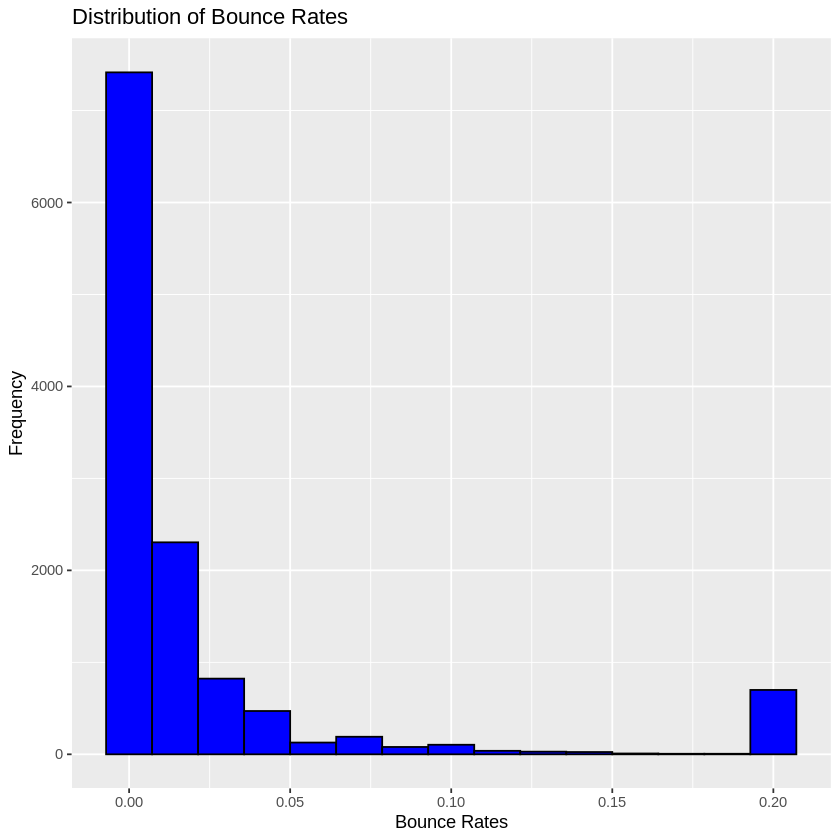

In [ ]:
# Zero-baseline Histogram for Bounce rates to show the distribution
ggplot(ol_shoppers_int, aes(x = BounceRates)) + # specify the dataset to use
  geom_histogram(bins = 15 ,fill = "blue", color = "black") + #plot histogram and fill bars with blue and black(edges)
  ggtitle("Distribution of Bounce Rates") + # put the title and x, y labels
  xlab("Bounce Rates") +
  ylab("Frequency")

`geom_smooth()` using formula = 'y ~ x'


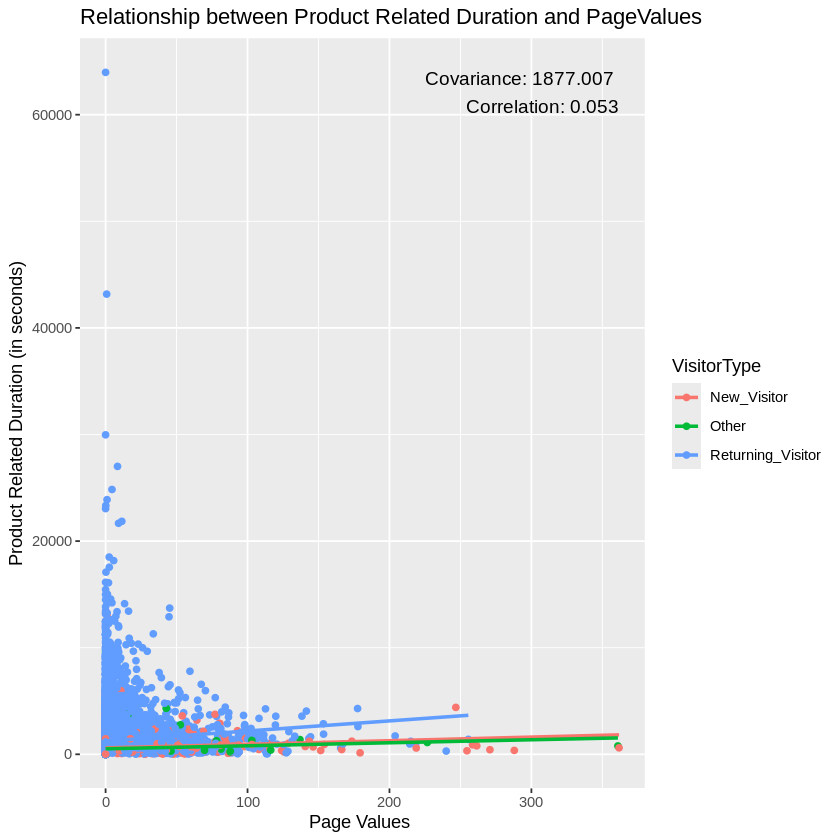

In [ ]:
# Calculate covariance and correlation between PageValues and ProductRelated_Duration
cov_value <- cov(ol_shoppers_int$PageValues, ol_shoppers_int$ProductRelated_Duration)
cor_value <- cor(ol_shoppers_int$PageValues, ol_shoppers_int$ProductRelated_Duration)


ggplot(ol_shoppers_int, aes(x =PageValues , y = ProductRelated_Duration, color = VisitorType)) + # change the color of data points by Visitor Type to distinguish
  geom_point() + # plot data as point
  geom_smooth(method = "lm", se = FALSE) +  #Add correlation line of Visitor type
  ggtitle("Relationship between Product Related Duration and PageValues") +
  xlab("Page Values ") +
  ylab("Product Related Duration (in seconds)")+
  annotate("text", x = max(ol_shoppers_int$PageValues), y = max(ol_shoppers_int$ProductRelated_Duration), # add the text of covariance and correlation in the graph
           label = paste("Covariance:", round(cov_value, 3),"\nCorrelation:",
           round(cor_value, 3)),
           hjust = "right", vjust =1, size = 4) # decide the position and size of the text

Approach: To show difference between two values, I ploted two types of bar for each level of Special Day in order to compare two values easily.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



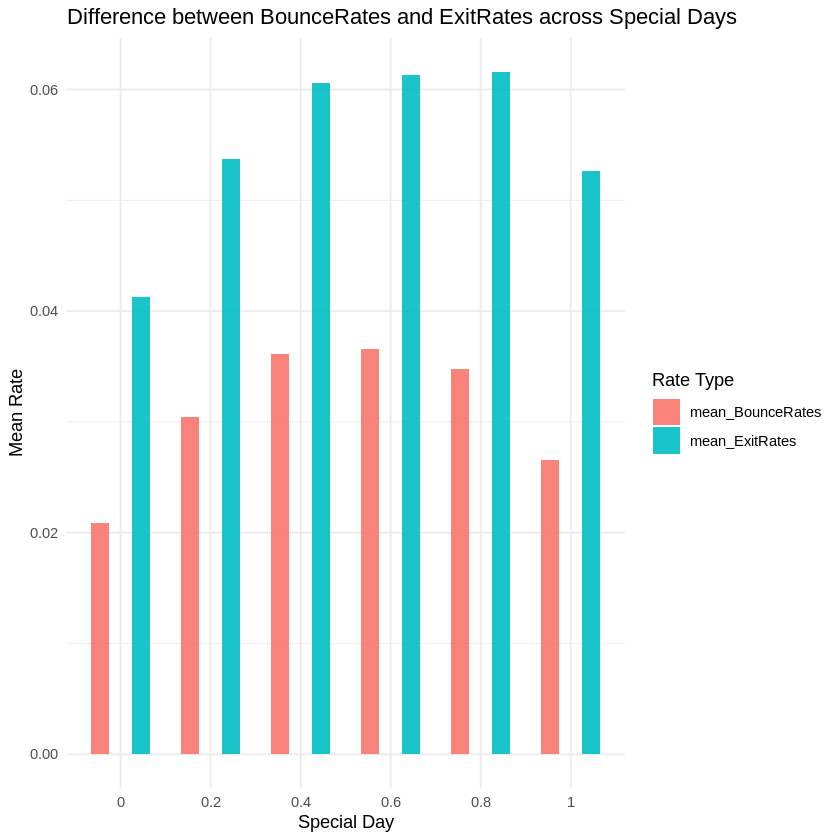

In [ ]:
library(dplyr) # to use summarise() later
install.packages("tidyr")
library(tidyr) #to use pivot_longer() later


# Group data by SpecialDay and calculate average Bounce Rates and Exit Rates
special_day_avg <- ol_shoppers_int %>%
  group_by(SpecialDay) %>%
  summarise(mean_BounceRates = mean(BounceRates), #Compute summary statistics for each group and create a new data frame
            mean_ExitRates = mean(ExitRates))

# special_day_avg_long data frames will be converted to long format data with one row corresponding to one observation
# This is to plot two bars next to each other in each of Special day levels below
special_day_avg_long <- special_day_avg %>%
  pivot_longer(cols = c(mean_BounceRates, mean_ExitRates),
               names_to = "Rate_Type",
               values_to = "Mean_Rate")

# Plot the bar chart that show two types of bar in one graph
ggplot(special_day_avg_long, aes(x = factor(SpecialDay), y = Mean_Rate, fill = Rate_Type)) + # y-axes will be "Mean" rate (not total rate) to keep the nature of the variable(rate cannot be compared with total)
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), alpha = 0.9, width = 0.4) + #use position = position_dodge(width = 0.9) to prevent two types of bar overlap
  labs(title = "Difference between BounceRates and ExitRates across Special Days",
       x = "Special Day",
       y = "Mean Rate",
       fill = "Rate Type") +
 theme_minimal() # make graph look better


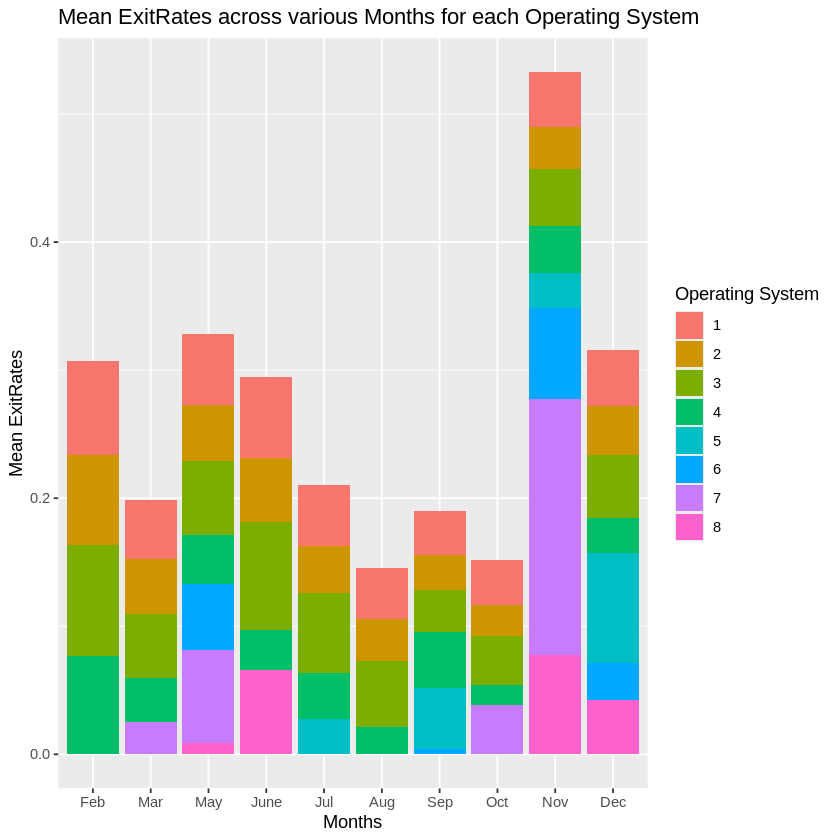

In [ ]:
# Define the order of Months to sort later
month_order <- c("Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

#Group ExitRates by Month and OperatingSystem and aggregate them by applying the mean function.
# y-axes will be "Mean" (not total value) to keep the nature of the variable(rate cannot be compared with total)
monthly_exit_rates <- aggregate(ExitRates ~ Month + OperatingSystems, data = ol_shoppers_int, FUN = mean)


# Plot by sorting months and filling the color of each OS
ggplot(monthly_exit_rates, aes(x = ordered(factor(Month, levels = month_order)), y = ExitRates, fill = factor(OperatingSystems))) +
  geom_bar(stat = "identity") +  # plot stacked bar chart and use stat = "identity" to plot the data as it is.
  ggtitle("Mean ExitRates across various Months for each Operating System") +
  xlab("Months") +
  ylab("Mean ExitRates") +
  scale_fill_discrete(name = "Operating System")  # add legend to distinguish each OS.



In [ ]:
# Calculate mean of Informational Duration excluding missing values
mean_info_duration <- mean(ol_shoppers_int$Informational_Duration, na.rm = TRUE)

# Median of Informational Duration excluding missing values
median_info_duration <- median(ol_shoppers_int$Informational_Duration, na.rm = TRUE)

# There is no built-in mode function in R, create it manually
mode_info_duration <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

mode_info_duration <- mode_info_duration(ol_shoppers_int$Informational_Duration) # apply the mode function I have created
paste("Informational Duration (in seconds) ")
paste(" -Mean:",mean_info_duration)
paste(" -Median:",median_info_duration)
paste(" -Mode:",mode_info_duration)

[1] "Informational Duration (in seconds) "

[1] " -Mean: 34.472397927723"

[1] " -Median: 0"

[1] " -Mode: 0"

1.   **Mean Informational Duration: 34.472397927723 seconds**

This value represents the average time spent on the informational page per person . On average, each user spent approximately 34.4 seconds on the informational pages. This indicates users typically stay on informational pages about 34 seconds.

2.   **Median of Informational Duration: 0 seconds**

The median of "informational Duration" is 0. This means that half of the users in the dataset don't even visit or stay at informational pages almost at all while the other half visit more than 0 seconds. This median indicates  the typical time spent at the informational pages is 0 seconds. in other words, it is normal for users don't visit or stay on the informational pages almost at all.
3. **Mode of Informational Duration: 0 seconds**

The most common "Informational Duration" is 0. This indicates that the majority of users in the dataset don't visit or stay on informational pages almost at all, which might be because users don't check informational pages such as "Terms of Use" or "policy information".

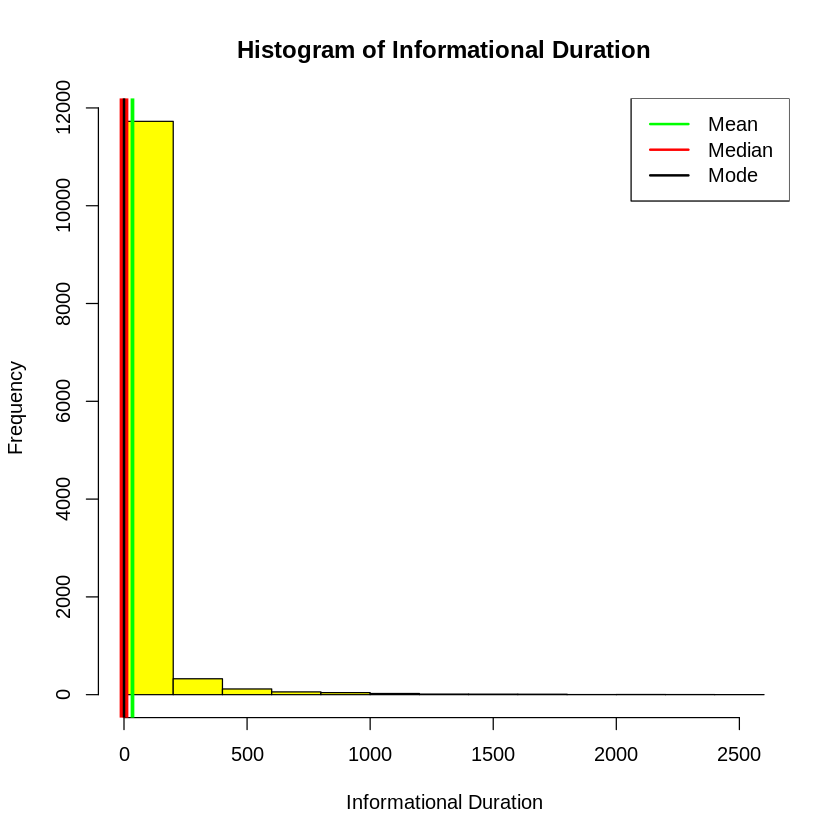

In [ ]:
#Plot Histogram to interpret mean, median, mode of Informational Duration
hist(ol_shoppers_int$Informational_Duration, main = "Histogram of Informational Duration", xlab = "Informational Duration", col = "yellow", )
abline(v = mean_info_duration, col = "green", lwd = 3) # add each line
abline(v = median_info_duration, col = "red", lwd = 7) # change the width of the line to make both mode and median lines visible even both overlap
abline(v = mode_info_duration, col = "black", lwd = 2)
legend("topright", legend = c("Mean", "Median", "Mode"), col = c("green", "red", "black"), lwd = 2)

The distribution of Informational duration is highly right-skewed(positive skewed), meaning there are a large number of users with shorter time spent on informational pages and fewer users with long duration.

The highest frequency of Informational duration falls in the lower Informational duration range, indicating that the most common Informational duration are on the lower end.

The mean "Informational duration", represented by the green line, appears to be slightly higher than the median "Informational duration", indicated by the red line above. This suggests that the mean is being pulled up by high-value of Informational duration. Since the median is less affected by extreme values, its position closer to the mode indicates that more than half of the users have Informational duration  less than the mean.

The location of the median to the left of the mean suggests that the majority of the visitors are staying at the Informational website shorter the mean, reaffirming the skewness of the distribution.





In [ ]:
# Caliculate the Range of Administrative Duration excluding missing values
profit_range <- range(ol_shoppers_int$Administrative_Duration, na.rm = TRUE)

# Caliculate Variance and Standard Deviation excluding missing values
Administrative_Duration_variance <- var(ol_shoppers_int$Administrative_Duration, na.rm = TRUE)
Administrative_Duration_sd <- sd(ol_shoppers_int$Administrative_Duration, na.rm = TRUE)

paste("Administrative Duration (in seconds) ")
paste(" -Range:", profit_range[2]-profit_range[1])
paste(" -Variance:",Administrative_Duration_variance)
paste(" -Standard Deviation:",Administrative_Duration_sd)


[1] "Administrative Duration (in seconds) "

[1] " -Range: 3398.75"

[1] " -Variance: 31250.8528380618"

[1] " -Standard Deviation: 176.779107470486"

 Administrative Duration is the total amount of time (seconds) spent by vistor on account management related pages

1.   **Range of Administrative Duration: 3398.75', (min, max = [0, 3398.75]) (seconds)**
The range indicates the span of Administrative Duration from the shortest to the longest, giving a sense of the overall Administrative Duration spread.
Also, it indicates that the lowest value of  "Administrative Duration" recorded in the dataset is 0, which suggests there some people that did not visit Administrative page almost at all. The highest value of Administrative Duration is 3398.75, indicating that some visited and stayed on the Administrative page for a very long time. This wide range suggests a high variability in the time spent in the administrative page of different visitors.

2.   **Variance of Administrative_Duration: 31250.8528380618**

The variance of Administrative Duration is approximately 31251. This value indicates how long "Administrative Duration" vary from the average Administrative Duration. This large value of the variance indicates a greater diversity or wide dispersion in Administrative Duration, which is how long users spent on the Administrative page.

3. **Standard Deviation of Discount: 176.779107470486**

The standard deviation of Administrative Duration is approximately 177. This value provides a measure of the average deviation of  Administrative Duration from the mean. This larger standard deviation indicates Administrative Duration is spread out over the wide range of Administrative Duration.



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


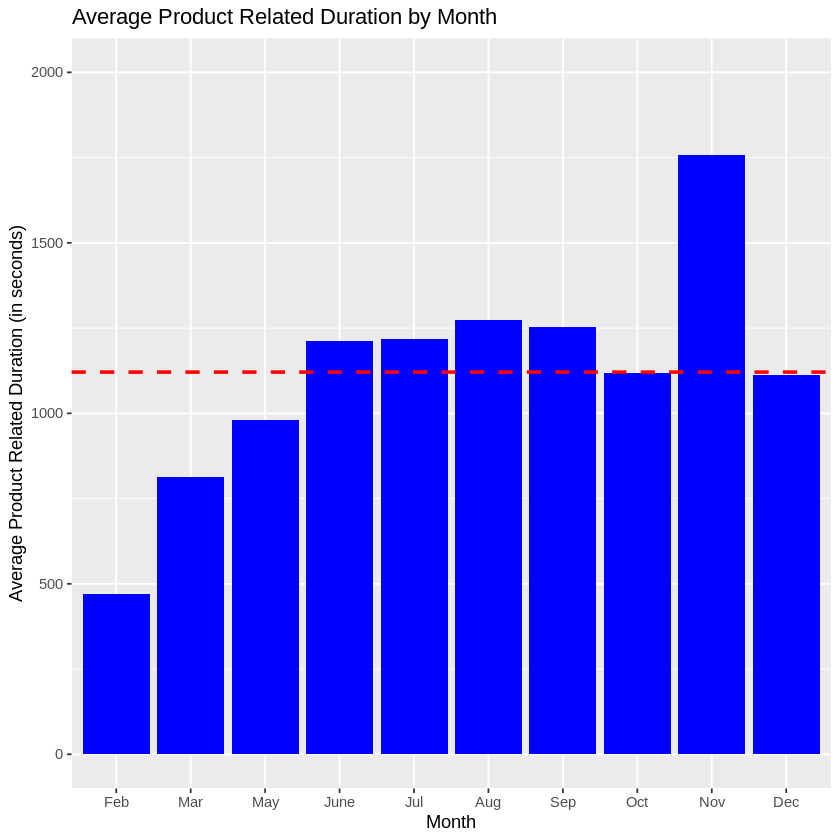

In [ ]:
# Prepare the ordered Month factor in order to sort Months later
month_order <- c("Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

#aggregate ProductRelated_Duration by Month and caliculate its mean
mean_ProductRelated_Duration <- aggregate(ProductRelated_Duration ~ Month, data = ol_shoppers_int, mean)

# Plot the bar chart to describe mean of ProductRelated_Duration across each month
ggplot(mean_ProductRelated_Duration, aes(x = ordered(factor(Month, levels = month_order)), y = ProductRelated_Duration)) + # sort month
  geom_bar(stat = "identity", fill = "blue") + # plot bar chat
  geom_hline(yintercept = mean(mean_ProductRelated_Duration$ProductRelated_Duration), color = "red", linetype = "dashed", size = 1) +
  ylim(0, 2000) + # set min and max range for y values for better visualization
  labs( # necessary components for graph
    title = "Average Product Related Duration by Month",
    x = "Month",
    y = "Average Product Related Duration (in seconds)"
  )


Average of product related duration represent average time(in seconds) spent by visitor on product related pages in each month.
It will be max values, which is 1750 seconds on November, which describes that customers tends to visit and stay at the on product related pages the longest on November. On the other hand, the average value will be the minimum, which is approximately 500 seconds on February. This describes customers tends to visit and stay at the on product related pages shortest on February.
The average line is drew where y = 1125(approximately). From the plot, Octorver and December are the month which has the average product related duration, which describes that customers tends to visit and stay at the on product related pages average length of time in October and December.




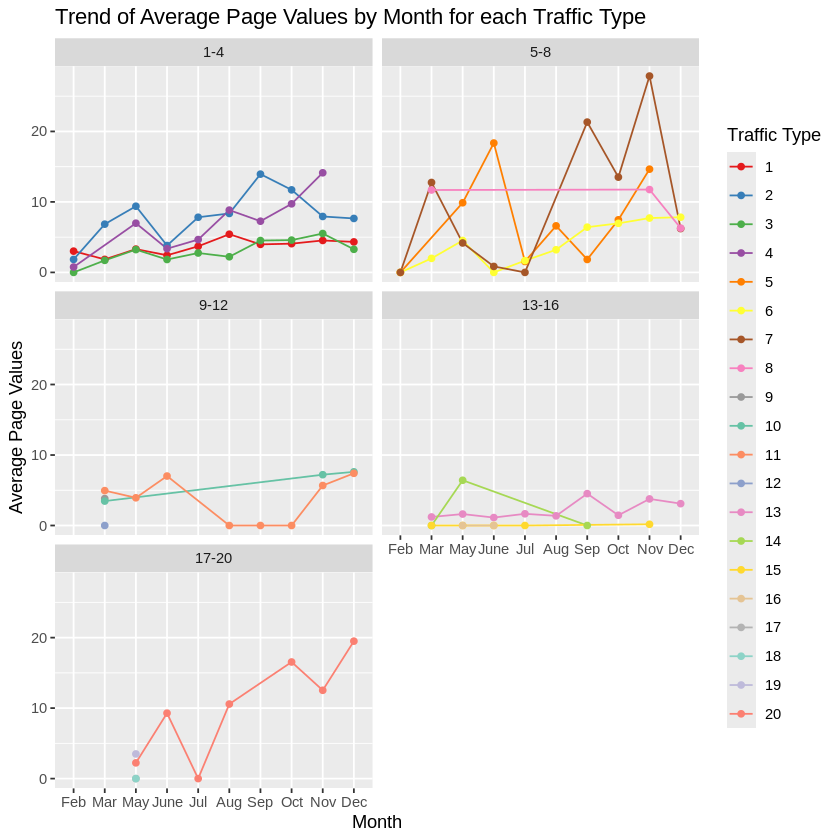

In [ ]:
# Define the order of Months to sort later
month_order <- c("Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

# Allocate traffic types into 5 different groups(each group has 4 lines)
ol_shoppers_int$TrafficTypeGroup <- cut(ol_shoppers_int$TrafficType,
                                        breaks = c(0, 4, 8, 12, 16, 20), # specify boundaries of breakpoint
                                        labels = c("1-4", "5-8", "9-12", "13-16", "17-20"))


# set completely different colors of lines in each graph to avoid the situation in which would be hard to distinguish lines in a graph
traffic_colors <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628", "#F781BF", "#999999", "#66C2A5",
                    "#FC8D62", "#8DA0CB", "#E78AC3", "#A6D854", "#FFD92F", "#E5C494", "#B3B3B3", "#8DD3C7", "#BEBADA", "#FB8072")

#plot the 5 line charts grouped by a particular range of traffic types above
ggplot(ol_shoppers_int, aes(x = ordered(factor(Month, levels = month_order)), y = PageValues, color = factor(TrafficType))) +
  geom_line(aes(group = factor(TrafficType)), stat = "summary", fun = "mean") + # Plot average page values for each traffic type for each month using " stat = "summary""
  geom_point(aes(group = factor(TrafficType)), stat = "summary", fun = "mean", size = 1.5) + # specify the size of data points for better visualization
  labs(title = "Trend of Average Page Values by Month for each Traffic Type", # y-axes will be "Mean" page values (not total value) to keep the nature of the variable(should not be compared with total)
       x = "Month",
       y = "Average Page Values",
       color = "Traffic Type") +
  facet_wrap(~TrafficTypeGroup, ncol = 2) +  # place graphs within 2 columns
  scale_color_manual(values = traffic_colors)  # put colors for each Traffic type


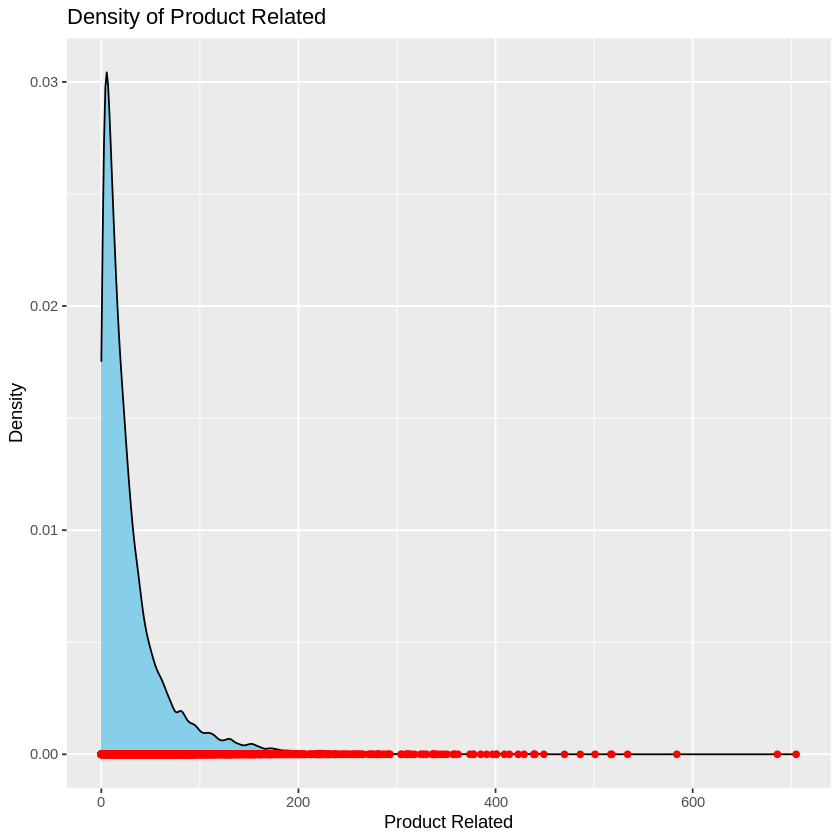

In [ ]:
ggplot(ol_shoppers_int, aes(x = ProductRelated)) + # plot density graph of "product related"
  geom_density(fill = "skyblue") +
  geom_point(aes(y = 0), color = "red") + # showcase indivisual data points
  labs(title = "Density of Product Related", # put necessary lables
       x = "Product Related",
       y = "Density")

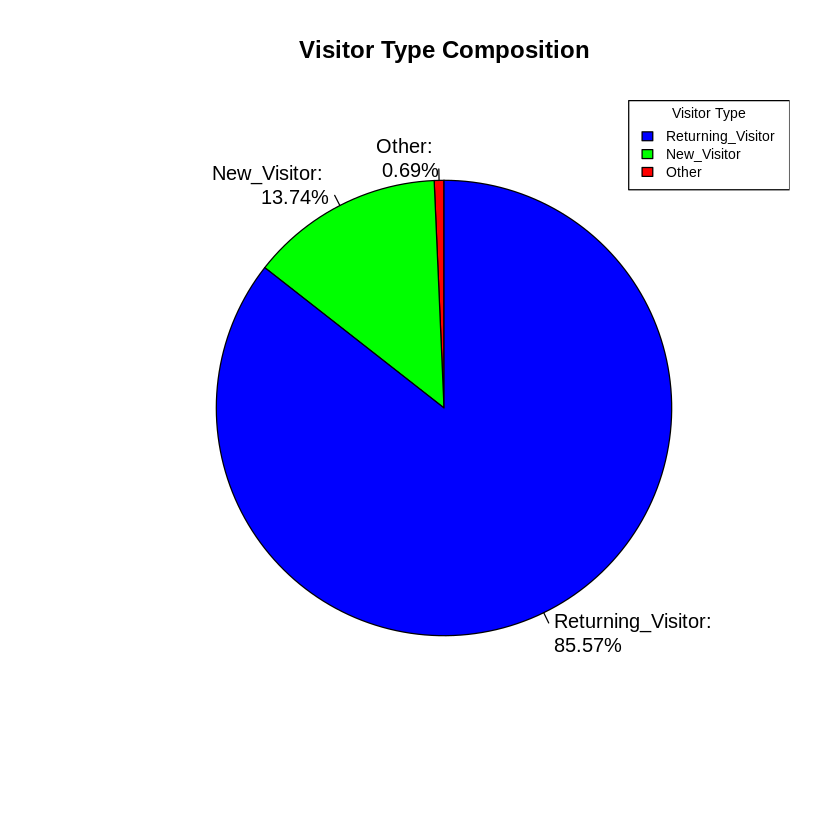

In [ ]:
# Calculate the percentage for each VisitorType
visitor_composition <- prop.table(table(ol_shoppers_int$VisitorType)) * 100

# Sort to show segments in pie chart the order of largest proportion to smallest one later
visitor_composition <- visitor_composition[order(visitor_composition, decreasing = FALSE)]

# Create the palette of specific colors
palette <- rainbow(length(visitor_composition))

# Plot the pie chart to describe the composition of the dataset in terms of Visitor Type
pie(visitor_composition,
    main = "Visitor Type Composition",  # Title
    col = palette,  # Use color palette for each Visitor Type
    cex = 1,  # Specify the size of the labels
    labels = paste(names(visitor_composition), ": ", "\n", round(visitor_composition, 2), "%", sep = ""),  # Label of proportion
    init.angle = 90)  # Let the first segment start from the position of 12 o'clock

# Add legend for better visualization
legend("topright", legend = names(rev(visitor_composition)), fill = rev(palette), title = "Visitor Type", cex = 0.7)
# use reverse function resort the "visitor_composition" and "palette" to adjust the order of variables in output

